In [1]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/yolo_v4/darknet/"
# %cd "/content/drive/My Drive/Diana/VG_AlexeyAB_darknet/darknet/"

/content/drive/My Drive/yolo_v4/darknet


In [3]:
# Compile darknet by using following code
!make
!chmod +x ./darknet

chmod +x *.sh


In [4]:
# convert certain files to unix
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (3,999 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144439 files and directories curr

In [5]:
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolo-obj.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./cfg/yolo-obj.cfg to Unix format...


In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
# ! ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show
! ./darknet detector train data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.855900, GIOU: 0.852076), Class: 0.995334, Obj: 0.624633, No Obj: 0.006144, .5R: 1.000000, .75R: 0.901961, count: 51, class_loss = 4.484839, iou_loss = 30.920773, total_loss = 35.405613 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.871026, GIOU: 0.868836), Class: 0.999523, Obj: 0.862244, No Obj: 0.025691, .5R: 1.000000, .75R: 0.965517, count: 58, class_loss = 2.097263, iou_loss = 7.379885, total_loss = 9.477148 

 5903: 1.507960, 1.644352 avg loss, 0.000010 rate, 6.482456 seconds, 377792 images, 0.257414 hours left
Loaded: 0.000051 seconds
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.742081, GIOU: 0.716503), Class: 0.996049, Obj: 0.218961, No Obj: 0.000070, .5R: 1.000000, .75R: 0.600000, count: 5, class_loss = 0.956071, iou_loss = 7.713024, total_loss = 8.669094 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) R

# **Results**

## Last 3 results

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_4000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_5000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_6000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_6000.weights -iou_thresh 0.25

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_6000.weights -iou_thresh 0.24

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

## All preceding results

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_1000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_2000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

In [0]:
! ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_3000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

# **Inference**

In [0]:
import os
import random
import cv2
import matplotlib.pyplot as plt

#define utility function
def imShow(path):

  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

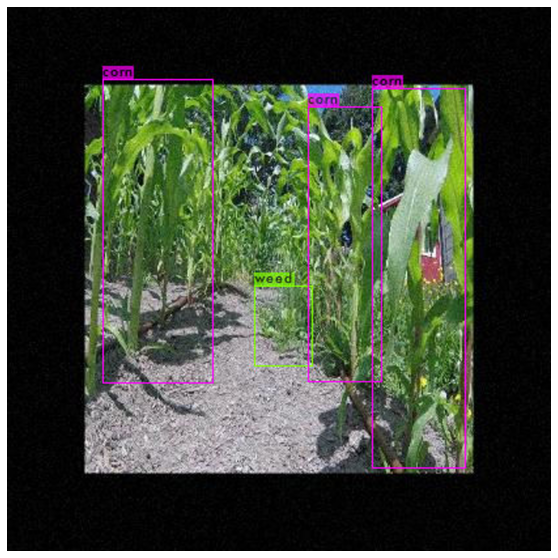

In [0]:
#/test has images that we can test our detector on
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]

img_path = "test/" + random.choice(test_images);

#test out our detector!
! ./darknet detect cfg/yolo-obj.cfg backup/yolo-obj_6000.weights {img_path} -dont-show
imShow('predictions.jpg')

In [0]:
# save images

test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]

for image in test_images:
  img_path = "test/" + image
  # The detect command is shorthand for a more general version of the command. It is equivalent to the command:
  # ./darknet detector test cfg/coco.data cfg/yolov2.cfg yolov2.weights data/dog.jpg
  ! ./darknet detect cfg/yolo-obj.cfg backup/yolo-obj_6000.weights {img_path} -dont-show  # default iou threshold is 0.24?
  os.rename("predictions.jpg", "predictions_" + image)


Streaming output truncated to the last 5000 lines.
  89 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
  90 conv    512       1 x 1/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.089 BF
  91 conv    512       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.797 BF
  92 Shortcut Layer: 89,  wt = 0, wn = 0, outputs:  13 x  13 x 512 0.000 BF
  93 conv    512       1 x 1/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.089 BF
  94 conv    512       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.797 BF
  95 Shortcut Layer: 92,  wt = 0, wn = 0, outputs:  13 x  13 x 512 0.000 BF
  96 conv    512       1 x 1/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.089 BF
  97 conv    512       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.797 BF
  98 Shortcut Layer: 95,  wt = 0, wn = 0, outputs:  13 x  13 x 512 0.000 BF
  99 conv    512       1 x 1/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.089 BF
 100 conv    512       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.797 BF
 

# **Test on video**

In [0]:
! ./darknet detector demo data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show GOPR2554.MP4 -out_filename res.avi

Streaming output truncated to the last 5000 lines.

FPS:11.8 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 98% 

FPS:11.8 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:11.6 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:11.6 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:11.7 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:11.9 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 97% 

FPS:11.9 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 97% 

FPS:12.0 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:12.1 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 98% 

FPS:12.0 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:12.1 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 99% 

FPS:12.1 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100% 
corn: 97% 

FPS:12.0 	 AVG_FPS:11.4

 cvWriteFrame 
Objects:

corn: 100%

In [0]:
! ./darknet detector demo data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show GOPR2553.MP4 -out_filename res_GOPR2553.avi

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 

In [0]:
! ./darknet detector demo data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show GOPR2552.MP4 -out_filename res_GOPR2552.avi

Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream st